In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Best Score 0.24667

In [2]:
train = pd.read_csv('../data/Train.csv')

In [3]:
test = pd.read_csv('../data/Test.csv')

In [4]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [5]:
train['TOP_PACK'].value_counts()

All-net 500F=2000F;5d                  58675
On net 200F=Unlimited _call24H         28387
Data:490F=1GB,7d                       21661
Data: 100 F=40MB,24H                   15590
Mixt 250F=Unlimited_call24H            12712
                                       ...  
NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE        1
200=unlimited pilot auto                   1
CVM_On-net 400f=2200F                      1
pilot_offer6                               1
Data:New-GPRS_PKG_1500F                    1
Name: TOP_PACK, Length: 111, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
user_id           400000 non-null object
REGION            242480 non-null object
TENURE            400000 non-null object
MONTANT           259723 non-null float64
FREQUENCE_RECH    259723 non-null float64
REVENUE           265337 non-null float64
ARPU_SEGMENT      265337 non-null float64
FREQUENCE         265337 non-null float64
DATA_VOLUME       203146 non-null float64
ON_NET            254181 non-null float64
ORANGE            233683 non-null float64
TIGO              160614 non-null float64
ZONE1             31690 non-null float64
ZONE2             25513 non-null float64
MRG               400000 non-null object
REGULARITY        400000 non-null int64
TOP_PACK          232671 non-null object
FREQ_TOP_PACK     232671 non-null float64
CHURN             400000 non-null int64
dtypes: float64(12), int64(2), object(5)
memory usage: 58.0+ MB


In [7]:
train.drop(['user_id', 'MRG'], axis=1, inplace=True)
test.drop(['user_id', 'MRG'], axis=1, inplace=True)

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [9]:
test.isna().sum()

REGION            39293
TENURE                0
MONTANT           34951
FREQUENCE_RECH    34951
REVENUE           33490
ARPU_SEGMENT      33490
FREQUENCE         33490
DATA_VOLUME       49338
ON_NET            36383
ORANGE            41200
TIGO              59788
ZONE1             92320
ZONE2             93578
REGULARITY            0
TOP_PACK          41703
FREQ_TOP_PACK     41703
dtype: int64

# Fixing the missing catergorical values

In [10]:
from sklearn.impute import SimpleImputer


miss = ['REGION', 'TOP_PACK']

imp = SimpleImputer(strategy="most_frequent")

train['REGION'] = imp.fit_transform(np.array(train['REGION']).reshape(-1,1))


In [11]:
train['TOP_PACK'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(train['TOP_PACK']).reshape(-1,1))

In [12]:
test['REGION'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(test['REGION']).reshape(-1,1))

In [13]:
test['TOP_PACK'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(test['TOP_PACK']).reshape(-1,1))

In [14]:
test.isna().sum()

REGION                0
TENURE                0
MONTANT           34951
FREQUENCE_RECH    34951
REVENUE           33490
ARPU_SEGMENT      33490
FREQUENCE         33490
DATA_VOLUME       49338
ON_NET            36383
ORANGE            41200
TIGO              59788
ZONE1             92320
ZONE2             93578
REGULARITY            0
TOP_PACK              0
FREQ_TOP_PACK     41703
dtype: int64

In [15]:
# PIPELINE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

cat = ['REGION', 'TENURE', 'TOP_PACK']

num = [
    'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
    'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY',
    'FREQ_TOP_PACK'
]

num_pipeline = Pipeline([('selector', DataFrameSelector(num)),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat)),
    ('encoder', OneHotEncoder(sparse=False)),
    #('poly', PolynomialFeatures(include_bias=False)),
])

full_pipeline = FeatureUnion([('num_pipeline', num_pipeline),
                              ('cat_pipeline', cat_pipeline)],
                             n_jobs=-1)

In [67]:
X = train.drop('CHURN', axis=1)
y = train['CHURN']

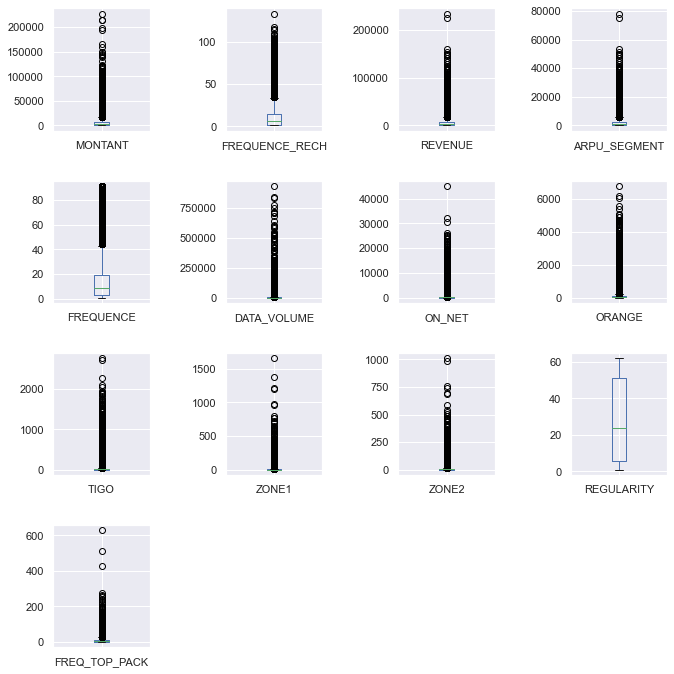

In [68]:
train[num].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey = False, figsize=(10,10))
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.show()

In [69]:
# Running throu the pipeline
X = full_pipeline.fit_transform(X)
# Using stratified shuffle fold
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [70]:
#from sklearn.ensemble import IsolationForest
#iso = IsolationForest(verbose=10, contamination=0.25)
#check = iso.fit_predict(X_train)
#mask = check != 1
#X_train, y_train = X_train[mask, :], y_train[mask]

In [71]:
#from imblearn.over_sampling import SMOTE

#X_t, y_t = SMOTE(random_state=42, n_jobs=-1).fit_resample(X_train, y_train)


#X_t.shape, y_t.shape
#X_train.shape, y_train.shape

In [76]:
# Using Cross Validation and SGD Classifier
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(l1_ratio=0,
                    #penalty=None,
                    loss='log',
                    n_jobs=-1,
                    max_iter=500,
                    tol=0.001,
                    alpha=0.0001,
                    warm_start=False, verbose=10)

cv = cross_val_score(sgd,
                     X_train,
                     y_train,
                     cv=3,
                     scoring='neg_log_loss',
                     n_jobs=-1,
                     verbose=10)
print(-cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.289082   0.28954517 0.28840579]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished


In [93]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

sgd2 = SGDClassifier(l1_ratio=1,
                    #penalty=None,
                    loss='log',
                    n_jobs=-1,
                    shuffle=False,
                    max_iter=100,
                    tol=0.01,
                    alpha=0.001,
                    warm_start=True,verbose=20, early_stopping=True)

sgd2.fit(X_train, y_train)
predz = sgd2.predict(X_test)

print(classification_report(y_test, predz))

-- Epoch 1
Norm: 3.13, NNZs: 143, Bias: -4.451938, T: 288000, Avg. loss: 0.267531
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 3.13, NNZs: 143, Bias: -4.369326, T: 576000, Avg. loss: 0.260078
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 3.14, NNZs: 143, Bias: -4.337974, T: 864000, Avg. loss: 0.259842
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 3.15, NNZs: 143, Bias: -4.320417, T: 1152000, Avg. loss: 0.259745
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 143, Bias: -4.309004, T: 1440000, Avg. loss: 0.259694
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 3.15, NNZs: 143, Bias: -4.300905, T: 1728000, Avg. loss: 0.259661
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.97 seconds
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     65031
           1       0.64      0.67      0.66     14969

    accuracy                           0.87     80000
   macro avg       0.78      0.7

In [78]:
y_test.value_counts()

0    65031
1    14969
Name: CHURN, dtype: int64

In [275]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.python.client import device_lib 

np.random.seed(42)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4797545758064693143
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1416435918
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10681079989524070633
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [356]:
tfmodel = Sequential()
tfmodel.add(Dense(16, input_dim=146, activation='sigmoid'))
tfmodel.add(BatchNormalization())

tfmodel.add(Dense(8, activation='sigmoid'))
tfmodel.add(BatchNormalization())

tfmodel.add(Dense(8, activation='sigmoid'))
tfmodel.add(BatchNormalization())

tfmodel.add(Dense(8, activation='sigmoid'))
tfmodel.add(BatchNormalization())

tfmodel.add(Dense(2, activation='sigmoid'))



In [357]:
tfmodel.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [358]:
tfmodel.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 16)                2352      
_________________________________________________________________
batch_normalization_110 (Bat (None, 16)                64        
_________________________________________________________________
dense_301 (Dense)            (None, 8)                 136       
_________________________________________________________________
batch_normalization_111 (Bat (None, 8)                 32        
_________________________________________________________________
dense_302 (Dense)            (None, 8)                 72        
_________________________________________________________________
batch_normalization_112 (Bat (None, 8)                 32        
_________________________________________________________________
dense_303 (Dense)            (None, 8)               

In [343]:
#X = X.toarray()
from imblearn.over_sampling import 



#from keras.utils.np_utils import to_categorical
y_train = to_categorical(y)

tfmodel.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.0s finished


IndexError: invalid index to scalar variable.

In [329]:
predt = tfmodel.predict(X_test)

print(classification_report())

[[0.993472   0.00562817]
 [0.93247694 0.07596904]
 [0.53556246 0.46196744]
 ...
 [0.97212243 0.03186739]
 [0.8752793  0.12836151]
 [0.80098695 0.2002085 ]]


In [304]:
# Using polynomial features

X = train.drop('CHURN', axis=1)
y = train['CHURN']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression(n_jobs=-1)


In [305]:
num_pipeline = Pipeline([('selector', DataFrameSelector(num)),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('poly', PolynomialFeatures(include_bias= False)),
                         ('scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat)),
                         ('encoder', OneHotEncoder())])

full_pipeline = FeatureUnion([('num_pipeline', num_pipeline),
                              ('cat_pipeline', cat_pipeline)], n_jobs=-1)

X = full_pipeline.fit_transform(X)

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [306]:
lmodel.fit(X_train, y_train)

pred = lmodel.predict(X_test)

print(classification_report(y_test, pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [105]:
xmod = LinearRegression(n_jobs=-1)


lmodel.intercept_

0.11814340267333884

In [23]:
sub.to_csv('submission5.csv', index=False)